In [1]:
import pandas as pd
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
# Explore fluctuations in stock markers vs. the Shekel rate. ref: https://www.themarker.com/markets/.premium-1.10783174

In [2]:
# NASDAQ closing
# source: https://finance.yahoo.com/quote/%5EIXIC/history/
nasdaq = pd.read_csv('../data/IXIC-20220508.csv')

In [3]:
#nasdaq.set_index(pd.to_datetime(nasdaq['Date']), drop=True, inplace=True)
nasdaq.set_index('Date', drop=True, inplace=True)
nasdaq

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-05-10,13687.589844,13687.929688,13401.740234,13401.860352,13401.860352,4795690000
2021-05-11,13115.849609,13423.309570,13107.669922,13389.429688,13389.429688,4719720000
2021-05-12,13215.490234,13288.610352,13002.540039,13031.679688,13031.679688,4730740000
2021-05-13,13150.940430,13247.870117,13007.240234,13124.990234,13124.990234,4681530000
2021-05-14,13255.650391,13460.879883,13242.969727,13429.980469,13429.980469,4008110000
...,...,...,...,...,...,...
2022-05-02,12331.690430,12542.540039,12202.410156,12536.019531,12536.019531,4896740000
2022-05-03,12511.459961,12645.830078,12460.990234,12563.759766,12563.759766,4522940000
2022-05-04,12574.730469,12985.009766,12367.019531,12964.860352,12964.860352,5467750000


In [4]:
# USD-ILS exchange rates
# Source https://excelrates.com/historical-exchange-rates/USD-ILS
ILS = pd.read_excel('../data/USD-ILS-20220508.xlsx')

In [5]:
ILS.set_index('Date', drop=True, inplace=True)
ILS

,USD,ILS
Date,,
2022-05-07,1,3.4026
2022-05-06,1,3.4026
2022-05-05,1,3.3986
2022-05-04,1,3.3698
2022-05-03,1,3.3722
...,...,...
2021-05-11,1,3.2833
2021-05-10,1,3.2490
2021-05-09,1,3.2704


In [6]:
merge=pd.merge(nasdaq, ILS, how='inner', left_index=True, right_index=True)
merge['USD'] = 1 / merge['ILS']

In [7]:
merge

,Open,High,Low,Close,Adj Close,Volume,USD,ILS
Date,,,,,,,,


In [8]:
def rev(s):
    return s[::-1]

/var/folders/l5/kkx8dwdn57s3v0k59p9m7sv80007gv/T/ipykernel_94781/2983838679.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation = -45)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


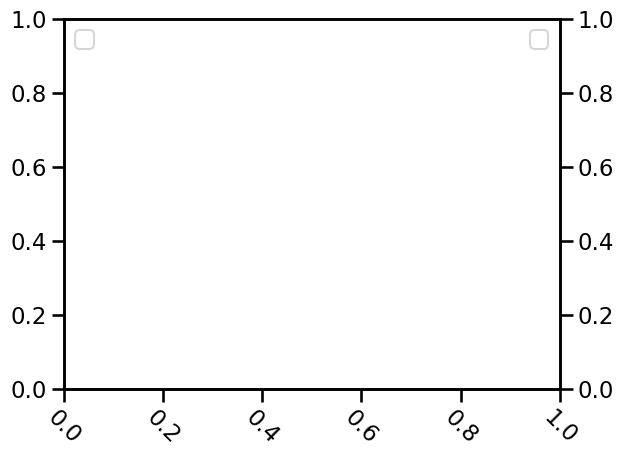

In [9]:
sns.set_context('talk')
#sns.set_style("darkgrid", {"figure.figsize":  [10, 7.5], "lines.linewidth": 5.5})
ax = sns.lineplot(data=merge['Close'], color="g", label=rev('נאסדק'))
ax.set_xticklabels(ax.get_xticklabels(),rotation = -45)

ax.legend(loc=0)
ax2 = plt.twinx()
ax3 = sns.lineplot(data=merge['USD'], color="b", ax=ax2, label=rev('דולר/שקל'))
ax3.legend(loc=2)

In [10]:
cr = merge['USD'].rolling(30).corr(merge['Close'])

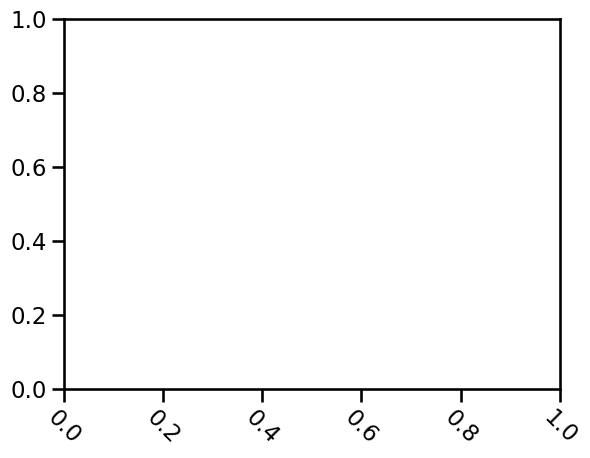

In [11]:
ax = sns.lineplot(data=cr)
#ax.set_xticklabels(ax.get_xticklabels(),rotation = -45)
ax.tick_params(axis='x', rotation=-45)


In [12]:
cr[-25:-1]

Series([], dtype: float64)